# ISA on scclevr: tracks

Let's see how this went. No warm up training...
Encoder: "MyBigResNet"

**Conclusion**: try with $\alpha=0$ because MSE is sooo high than BCE does not contribute and therefore separation gets not learned. 
Reason: ISA learns delta R.....?

In [1]:
import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mlp
from mpl_toolkits.axes_grid1 import make_axes_locatable

import json, yaml, os
os.sys.path.append('./../../code')

from plotting import plot_kslots, plot_kslots_iters
from data import make_batch
from model import InvariantSlotAttention

from matplotlib.patches import Circle
import json

# Set numpy seed for test set sampling 
torch_seed = 24082023
torch.manual_seed( torch_seed )

import random
random.seed(torch_seed)

%load_ext autoreload
%autoreload 2

In [2]:
device = 'cpu'

In [4]:
cID_prev = 'isa-scclevr-tracks'
with open(f'./../../code/configs/{cID_prev}.yaml') as f:
    cd = yaml.safe_load(f)

hps = cd['hps']
hps['device'] = device

In [5]:
m = InvariantSlotAttention(**hps)

Using MyBigResNet to encode data.


In [6]:
f = open(f'./../../code/models/{cID_prev}/loss.json')
# returns JSON object as a dictionary
losses = json.load(f)

loss  tot  min:  5458.23193359375  at  7263
loss  bce  min:  0.3515297472476959  at  1813
loss  mse  min:  1819.123779296875  at  7263


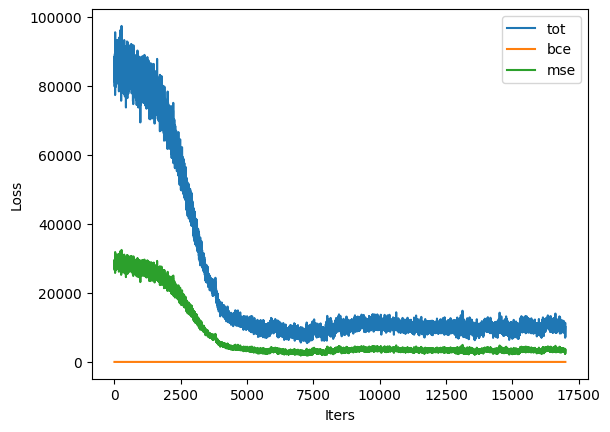

In [7]:
for k,v in losses.items():
    plt.plot(v,label=k)
    print("loss ", k, " min: ", np.min(v), " at ", np.argmin(v))
plt.xlabel('Iters')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
lastIter = 7000
weightPath = f'./../../code/models/{cID_prev}/m_{lastIter}.pt'
print(f'Starting from an earlier training',lastIter)

m.load_state_dict(torch.load(weightPath,map_location=device))

Starting from an earlier training 7000


<All keys matched successfully>

### Evaluate the model

Use the common evaluation framework

In [9]:
import scclevr
os.sys.path.append('./../../../evaluation')
from dataset import TestDataset
import model_performance as ev
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
ds = TestDataset(obj_type="track")
X = torch.FloatTensor(ds.event_images).to(device)

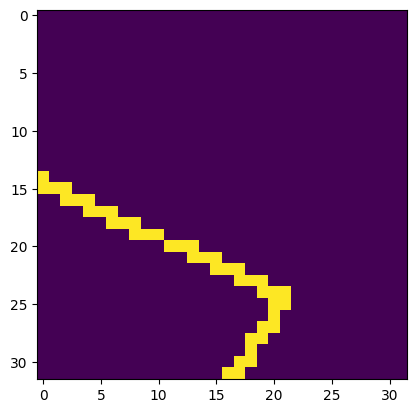

In [32]:
plt.imshow(ds.event_images[0, 0])

In [33]:
with torch.no_grad():
    queries, att, Y_pred = m(X) 

In [34]:
mp = ev.Model_performance(ds, att)
mp.hungarian_matching()

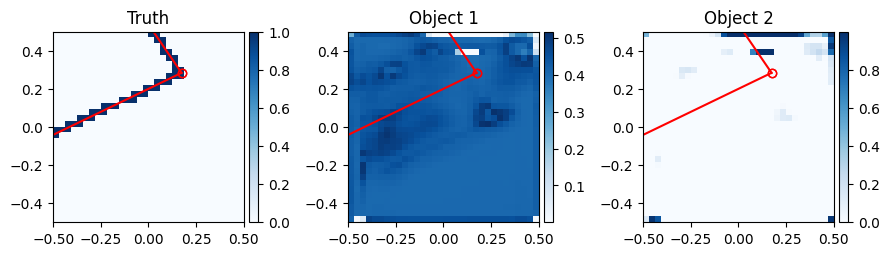

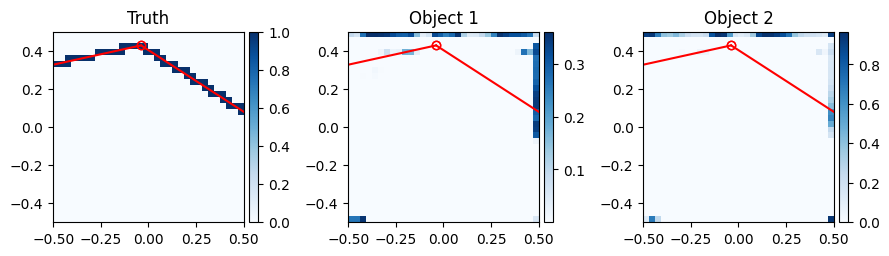

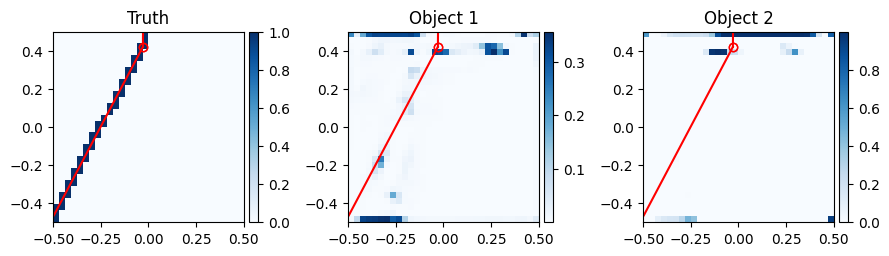

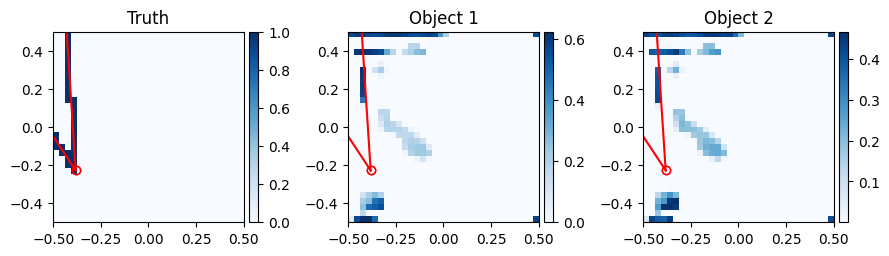

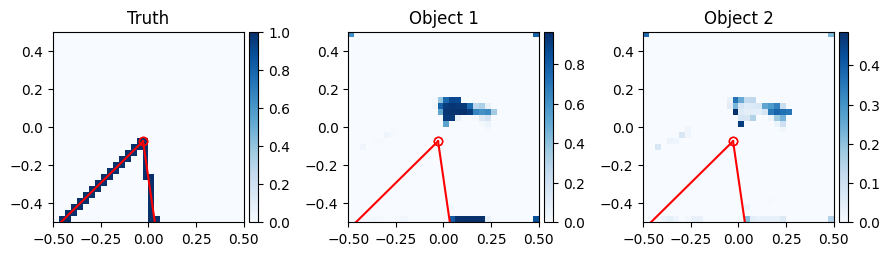

In [41]:
for i in range(5):
    mp.plot_instance_i(i, obj_type="track")

In [42]:
loss = mp.KL_loss()
np.log10(loss)

tensor(inf)

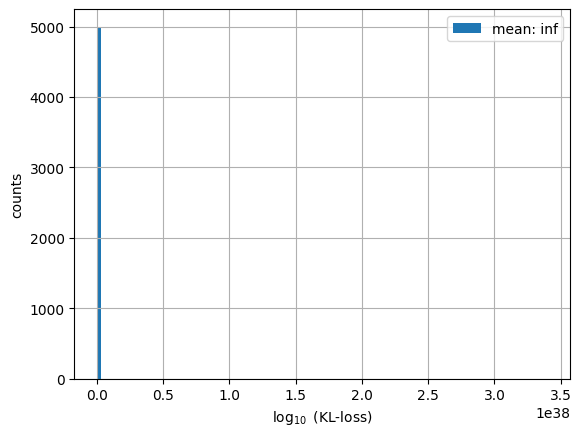

In [43]:
n, bins = mp.loss_hist()

This is actually not as good as I hoped for... :( more CNN performed better!

In [23]:
#with open('./loss_histograms/ISA-tracks.npy', 'wb') as f:
#    np.save(f, n)
#    np.save(f, bins)